In [212]:
import os
import re
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

import seaborn as sns

% matplotlib inline

In [155]:
# read in all relevant files
data_path = "../logs/"
problem = "cm"
date = "07_14"

problems = {"cm":"Copy Memory Problem", "ap": "Adding Problem", "mnist":"MNIST Image Problem"}

In [163]:
# create regex to filter for just the folders we want
regex = re.compile(r'..\/logs\/{}\/.*\/07_1[6-7].*\/.*logs'.format(problem))

In [164]:
# filter just folders we want
n = []
for root, dirs, files in os.walk(os.path.join(data_path,problem), topdown=True):
    for name in dirs:
        n.append(os.path.join(root,name))
        
n = list(filter(regex.search,n))

In [130]:
def parse_name(name):
    name = name[name.find(problem) + len(problem) + 1:]
    
    name = name[:name.find("/logs")]
    
    return name.replace("/","_")

In [176]:
# parse folder into data frame
def parse_folder(name, full_loss=False):
    # creates data frame (dictionary?) with a variety of attributes
    loss = np.genfromtxt(os.path.join(name,"losses.txt"), 
                  delimiter="\n",names=["loss"], autostrip=True)

    loss = [i[0] for i in loss]
    
    with open(os.path.join(name,"info.txt")) as file:
        data = json.load(file)
    
    if full_loss:
        data["loss"] = loss
    
    # get average of five lowest values
    data["mean_loss"] = np.mean(np.sort(loss)[:5])
    data["num_steps"] = len(loss)
    
    return data, parse_name(name)

In [242]:
# loop through all things in string of interest
results = {}
for name in n:
    data, trial_name = parse_folder(name)
    results[trial_name] = data

In [243]:
# process into a data frame
r = pd.DataFrame.from_dict(results).transpose()
# coerce numeric columnsinto the correct data format
for column in ["mean_loss", "trainable_params","training_time"]:
    r[column] = r[column].astype(float)

In [244]:
r.groupby("name").mean()

,mean_loss,trainable_params,training_time
name,,,
cm_d1,0.067390,3082.0,1970.256138
cm_d1fr1pd2i,0.064243,3466.0,3738.451418
cm_d1fr1pd2ir2d3,0.069354,3850.0,4277.576717
cm_fd2i,0.074217,3082.0,2980.079767
cm_fr1d2i,0.075952,3338.0,3282.215906
cm_r1,0.471755,3210.0,2390.553572
cm_r2d3,0.064268,3338.0,2692.299803


<Figure size 432x288 with 0 Axes>

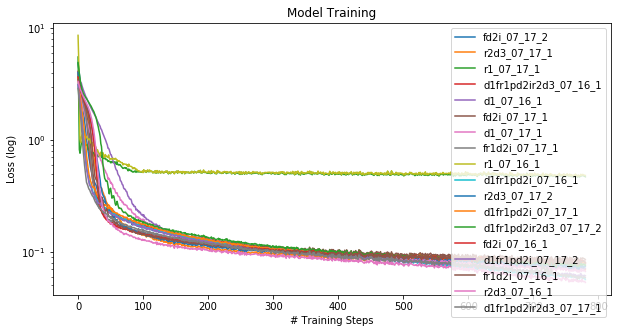

In [166]:
# plot all results
plt.clf()
fig = plt.figure(figsize=(10,5))
for key, val in results.items():
    plt.semilogy(val["loss"], label=key)

plt.legend()
plt.ylabel("Loss (log)")
plt.xlabel("# Training Steps")
plt.title("Model Training")
plt.show()

<Figure size 432x288 with 0 Axes>

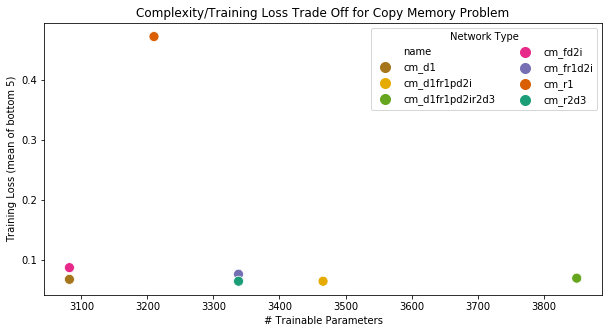

In [241]:
mean_results = r.groupby("name").mean()

pt_size = 100

plt.clf()
fig = plt.figure(figsize=(10,5))

# for key, val in results.items():
mean_results["name"]=list(mean_results.index)
# plt.scatter(mean_results["trainable_params"],mean_results["mean_loss"])
# mean_results.plot.scatter(x="trainable_params", y="mean_loss")
sns.scatterplot(x="trainable_params", y="mean_loss", hue="name", data=mean_results,
               palette="Dark2_r", size="name", sizes=(pt_size,pt_size))

plt.title("Complexity/Training Loss Trade Off for {}".format(problems[problem]))
plt.ylabel("Training Loss (mean of bottom 5)")
plt.xlabel("# Trainable Parameters")
plt.legend(ncol=2, title="Network Type")
plt.show()

In [214]:
mean_results.sort("trainable_params")

/Users/heidihurst/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,mean_loss,trainable_params,training_time,name
name,,,,
cm_d1,0.067390,3082.0,1970.256138,cm_d1
cm_fd2i,0.086910,3082.0,2550.102913,cm_fd2i
cm_r1,0.471755,3210.0,2390.553572,cm_r1
cm_fr1d2i,0.075952,3338.0,3282.215906,cm_fr1d2i
cm_r2d3,0.064268,3338.0,2692.299803,cm_r2d3
cm_d1fr1pd2i,0.064243,3466.0,3738.451418,cm_d1fr1pd2i
cm_d1fr1pd2ir2d3,0.069354,3850.0,4277.576717,cm_d1fr1pd2ir2d3


In [160]:
d, name = parse_folder(n[0])

In [162]:
d.keys()

dict_keys(['run_date', 'name', 'samples', 'num_hidden', 'loss', 'cell_type', 'start_time', 'mean_loss', 'net_type', 'num_out', 'end_time', 'problem', 'timesteps', 'training_time', 'optimizer', 'directory', 'batch_size', 'num_target', 'num_in', 'epochs', 'learning_rate', 'trainable_params', 'decay'])